In [23]:

import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

import numpy as np


In [24]:
def extract_data_from_file(file_path):
    # Initialize a list to store all detected outputs
    all_detected_outputs = []

    # Open the file for reading
    with open(file_path, 'r') as file:
        # Loop through each line in the file
        for line in file:
            # Check if the line contains the pattern "(interaction weight)"
            if "Score" not in line:
                if "Path" in line:
                    if ":" in line:
                        # Find the position of "Path" in the line
                        index = line.find(":")

                        # Extract the substring starting from the position of "Path" to the end of the line
                        extracted_string = line[index+len(": "):].strip()

                        # Split the extracted string by "->" to get individual values
                        values = extracted_string.split("->")

                        # Initialize a list to store extracted values
                        extracted_values = []

                        # Loop through each value
                        for value in values:
                            # Extract and append the trimmed value to the extracted values list
                            extracted_values.append(value.strip())

                        # Append the extracted values list to the list of all detected outputs
                        all_detected_outputs.append(extracted_values)

    # Return all the detected outputs
    return all_detected_outputs

In [25]:
# Example usage:
file_path = "C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/Graph-Construction-shortest-path/acyclic_shortest_paths.txt"
detected_outputs = extract_data_from_file(file_path)
print("Detected outputs:")
# print(detected_outputs)
for output in detected_outputs:
    print(output)

Detected outputs:
['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1']
['Q9NQ76', 'P62993', 'P62241', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13535', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13315', 'Q8N5P1']
['Q9NQ76', 'P12931', 'Q13435', 'Q8N5P1']
['Q9NQ76', 'P06241', 'Q9H7E9', 'Q8N5P1']


In [37]:
def create_graph_from_pathways(pathways):
    # Create a directed graph
    
    graph_items = nx.DiGraph()

    # Add nodes and edges from pathways
    for pathway in pathways:
        for i in range(len(pathway) - 1):
            source_node = pathway[i]
            target_node = pathway[i + 1]
            graph_items.add_edge(source_node, target_node)

    return graph_items


def plot_graph(graph_items):
    # Plot the graph
        # Retrieve the first node by finding nodes with no predecessors
    first_node = [node for node in graph_items.nodes if not list(graph_items.predecessors(node))][0]

    # Retrieve the last node by finding nodes with no successors
    last_node = [node for node in graph_items.nodes if not list(graph_items.successors(node))][0]

    
    node_colors = ["orange" if node in first_node  else "green" if node in last_node else "skyblue" for node in graph_items.nodes]
    pos = nx.spring_layout(graph_items)
    nx.draw(graph_items, pos, with_labels=True, node_size=1500, node_color=node_colors, font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Pathway Graph")
    plt.show()

[('Q9NQ76', 'O14757'), ('Q9NQ76', 'P62993'), ('Q9NQ76', 'P00519'), ('Q9NQ76', 'P12931'), ('Q9NQ76', 'P06241'), ('O14757', 'Q8IVT5'), ('Q8IVT5', 'Q8N5P1'), ('P62993', 'P62241'), ('P62241', 'Q8N5P1'), ('P00519', 'Q13535'), ('P00519', 'Q13315'), ('Q13535', 'Q8N5P1'), ('Q13315', 'Q8N5P1'), ('P12931', 'Q13435'), ('Q13435', 'Q8N5P1'), ('P06241', 'Q9H7E9'), ('Q9H7E9', 'Q8N5P1')]


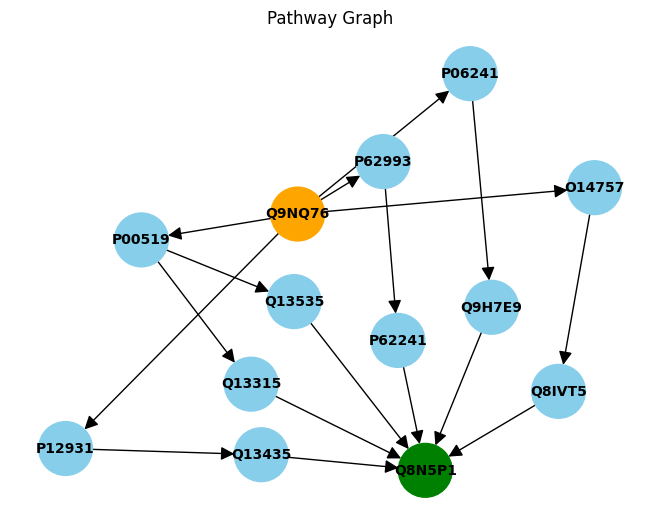

In [38]:
graph = create_graph_from_pathways(detected_outputs)
print(graph.edges())
plot_graph(graph)

In [36]:
def transform_and_remove_repeated_elements(pathways):
    # Flatten the 2D array to 1D array
    flattened_pathways = [protein for pathway in pathways for protein in pathway]

    # Check for repetition and remove repeated elements
    unique_elements = []
    repeated_elements = set()
    for protein in flattened_pathways:
        if protein not in unique_elements:
            unique_elements.append(protein)

    return unique_elements

unique_elements = transform_and_remove_repeated_elements(detected_outputs)
print("Unique elements after removing repetitions:", unique_elements)

Unique elements after removing repetitions: ['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1', 'P62993', 'P62241', 'P00519', 'Q13535', 'Q13315', 'P12931', 'Q13435', 'P06241', 'Q9H7E9']


In [29]:
def adjacency_matrix_2d(pathways, path_1_D):
    # Create the adjacency matrix
    adjacency_matrix = np.zeros((len(path_1_D), len(path_1_D)))
    for i in range(len(path_1_D)):
        for j in range(len(path_1_D)):
            for path in pathways:
                for k in range(len(path) - 1):
                    if path_1_D[i] == path[k] and path_1_D[j] == path[k + 1]:  
                        adjacency_matrix[i][j] = 1
    adjacency_matrix = adjacency_matrix.astype(int)
    
    # Calculate the maximum width for the alignment
    max_width = max(len(s) for s in path_1_D) + 2  # Adding extra space for better readability

    # Create the header row
    header = " " * max_width + " ".join([f"{item:>{max_width}}" for item in path_1_D])
    
    # Create the matrix rows with enhanced spacing and style
    rows = []
    for i, row in enumerate(adjacency_matrix):
        row_str = " ".join([f"{val:>{max_width}}" for val in row])
        rows.append(f"{path_1_D[i]:>{max_width}} {row_str}")

    # Save the formatted adjacency matrix to a file
    with open("adjacency_matrix.txt", "w") as matrix_file:
        matrix_file.write(header + "\n")
        for row in rows:
            matrix_file.write(row + "\n")


In [30]:
adjacency_matrix_2d(detected_outputs, unique_elements)
